In [59]:
# import libraries

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Normalization, Flatten

In [2]:
# loading the dataset

from tensorflow.keras.datasets import cifar10 

data = cifar10.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = data

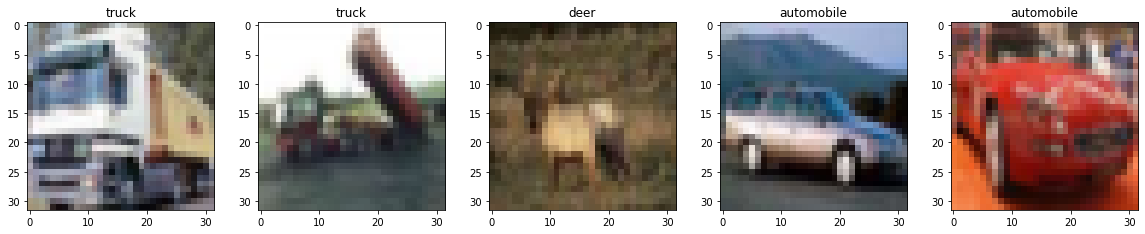

In [44]:
# visualizing the dataset

from matplotlib import pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 20))

for i in range(1, 6):
    plt.subplot(5,5,(i))
    plt.title(class_names[y_train[i][0]])
    plt.imshow(X_train[i])
    
    
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [96]:
# building the model

model = Sequential()
model.add(Normalization(input_shape=(32,32,3)))
model.add(Conv2D(32, padding='same', activation='relu', kernel_size=3))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, padding='same', activation='relu', kernel_size=3))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, padding='same', activation='relu', kernel_size=3))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_29 (Normaliza  (None, 32, 32, 3)        7         
 tion)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                     

In [97]:
epochs=10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/10


/home/devesh/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 53s 34ms/step - loss: 1.8103 - accuracy: 0.4023 - val_loss: 1.3818 - val_accuracy: 0.4991
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2513 - accuracy: 0.5563 - val_loss: 1.1682 - val_accuracy: 0.5918
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0898 - accuracy: 0.6178 - val_loss: 1.0694 - val_accuracy: 0.6219
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9786 - accuracy: 0.6585 - val_loss: 1.0220 - val_accuracy: 0.6518
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9010 - accuracy: 0.6848 - val_loss: 0.9899 - val_accuracy: 0.6617
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8278 - accuracy: 0.7098 - val_loss: 1.0038 - val_accuracy: 0.6627
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7706 - accuracy: 0.7304 - val_loss: 1.0081 - val_accura

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

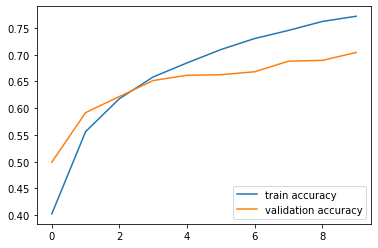

In [105]:
plt.figure()
plt.plot(range(10), acc, label='train accuracy')
plt.plot(range(10), val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.show()